# __Visualizacion de datos__

## Importar librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Cargar datos

In [2]:
df = pd.read_csv('./data_in/inmigrantes_canada.csv')
df.head()

,Pais,Continente,Region,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afganistán,Asia,Sur de Asia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europa,Sur de Europa,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Argelia,África,Norte de África,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Samoa Americana,Oceanía,Polinesia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europa,Sur de Europa,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


## Entendiendo los datos

Fuimos contratados como analistas de datos para trabajar en una consultoría que presta servicios de migración para colombianos que desean viajar a Canadá. En este proyecto, estaremos analizando un conjunto de datos que contiene información histórica sobre la inmigración en Canadá proveniente de todos los países del mundo desde el año 1980 hasta el año 2013.

Tenemos la columna país, la columna continente, la columna región, y la columna que lleva los números de los años entre 1980 y 2013. Tenemos 33 años de registro y el total de inmigrantes en Canadá durante ese periodo.

## Analisis basico

In [3]:
# dimensiones de los datos
df.shape

(195, 38)

> Hay 195 registros y 38 variables

In [4]:
# tipo de dato de cada variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Pais        195 non-null    object
 1   Continente  195 non-null    object
 2   Region      195 non-null    object
 3   1980        195 non-null    int64 
 4   1981        195 non-null    int64 
 5   1982        195 non-null    int64 
 6   1983        195 non-null    int64 
 7   1984        195 non-null    int64 
 8   1985        195 non-null    int64 
 9   1986        195 non-null    int64 
 10  1987        195 non-null    int64 
 11  1988        195 non-null    int64 
 12  1989        195 non-null    int64 
 13  1990        195 non-null    int64 
 14  1991        195 non-null    int64 
 15  1992        195 non-null    int64 
 16  1993        195 non-null    int64 
 17  1994        195 non-null    int64 
 18  1995        195 non-null    int64 
 19  1996        195 non-null    int64 
 20  1997      

> Hay 3 variables de tipo object, el resto son de tipo entero.

> No presenta valores faltantes

In [5]:
# pasar variable Pais como indice
df.set_index('Pais', inplace=True)
df

,Continente,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Pais,,,,,,,,,,,,,,,,,,,,,
Afganistán,Asia,Sur de Asia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europa,Sur de Europa,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15699
Argelia,África,Norte de África,80,67,71,69,63,44,69,132,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
Samoa Americana,Oceanía,Polinesia,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europa,Sur de Europa,0,0,0,0,0,0,2,0,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,Asia,Sudeste Asiático,1191,1829,2162,3404,7583,5907,2741,1406,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Sahara Occidental,África,Norte de África,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Yemen,Asia,Asia Occidental,1,2,1,6,0,18,7,12,...,161,140,122,133,128,211,160,174,217,2985


Con el pais como indice, podemos crear un nuevo dataframe que contenga dos columnas: anos y cantidad de inmigrantes especificamente de Colombia que es el objetivo de nuestro analisis.

In [6]:
# lista de de string con todos los anos del df
anos = list(map(str, range(1980, 2014)))
anos

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [7]:
# generamos una Serie con los anos como indice y cantidad de inmigrantes 
colombia = df.loc['Colombia', anos]
colombia

1980     266
1981     326
1982     360
1983     244
1984     235
1985     214
1986     257
1987     376
1988     352
1989     439
1990     614
1991     652
1992     582
1993     464
1994     375
1995     371
1996     381
1997     578
1998     929
1999    1306
2000    2259
2001    2965
2002    3283
2003    4318
2004    4566
2005    6424
2006    6535
2007    5357
2008    5452
2009    4652
2010    5218
2011    4366
2012    3741
2013    3631
Name: Colombia, dtype: object

In [8]:
# convertimos Serie a dataframe a traves de un diccionario
col_dict = {
    'Año': colombia.index.to_list(),
    'Inmigrantes': colombia.values.tolist()
    }

In [11]:
# generamos el dataframe
datos_col = pd.DataFrame(col_dict)
datos_col.sample(5)

,Año,Inmigrantes
6,1986,257
13,1993,464
8,1988,352
16,1996,381
0,1980,266


## Visualizacion de datos

Vamos a crear una visualizacion de la cantidad de inmigrantes colombianos en el periodo dado para mostrar la tendencia en el tiempo. 

ConversionError: Failed to convert value(s) to axis units: ['0', '500', '1000', '1500', '2000', '2500', '3000', '3500', '4000', '4500', '5000', '5500', '6000', '6500']

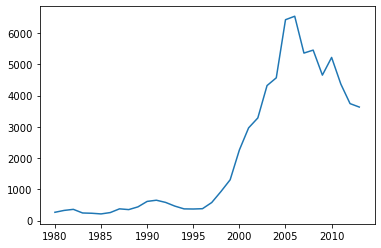

In [10]:
plt.plot(datos_col['Año'], datos_col['Inmigrantes'])
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])
plt.yticks(['0', '500', '1000', '1500', '2000', '2500', '3000', '3500', '4000', '4500', '5000', '5500', '6000', '6500'])
plt.show()

> Nos muestra la tendencia de colombianos inmigrantes en Canada en el tiempo.